In [1]:
%load_ext autoreload
%autoreload 2

In [65]:
import time
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from helperDGs import Graph
from collections import defaultdict
import dill

mpl.rcParams['xtick.major.size'] = 20
mpl.rcParams['xtick.major.width'] = 4
mpl.rcParams['xtick.minor.size'] = 10
mpl.rcParams['xtick.minor.width'] = 2

mpl.rcParams['ytick.major.size'] = 20
mpl.rcParams['ytick.major.width'] = 4
mpl.rcParams['ytick.minor.size'] = 10
mpl.rcParams['ytick.minor.width'] = 2


In [42]:
N_trials = 1000
Ns = np.array([100, 200, 400])
fs = np.arange(0.5, 5+1e-5, 0.1)/100
components = defaultdict(list)
for i in range(len(Ns)):
    for j in range(len(fs)):
        for k in range(N_trials):
            temp_mask = np.zeros(Ns[i]**2)
            temp_mask[np.random.permutation(Ns[i]**2)[:int(fs[j]*Ns[i]**2)]] = 1
            us, vs = np.where(temp_mask.reshape(Ns[i], Ns[i]))
            g = Graph.createGraph(Ns[i], us, vs)
            SCCs = g.findSCCs()
            components['%d-%.1f' % (Ns[i], 100*fs[j])].append(np.max([len(x) for x in SCCs]))


In [53]:
def expected_accuracy(components):
    expected_accuracies = defaultdict(list)
    for k in components:
        N = int(k.split('-')[0])
        sparsity = float(k.split('-')[1])
        components_sizes = components[k]
        available_sizes, counts_sizes = np.unique(components_sizes, return_counts=True)
        ks = N - available_sizes
        As = (1 - ks * (3*N**2 - 3*N*ks + ks**2)/(2 * N**3))
        qs = counts_sizes / len(components_sizes)
        expected_accuracies[N].append([sparsity, (As * qs).sum()])
    return expected_accuracies

In [54]:
EAs = expected_accuracy(components)

In [61]:
np.array(EAs[100])[:,0]

array([0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7,
       1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3. ,
       3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4. , 4.1, 4.2, 4.3,
       4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. ])

No handles with labels found to put in legend.


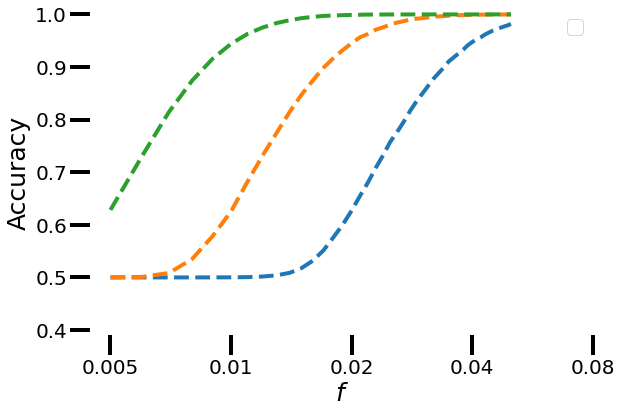

In [64]:
plt.figure(figsize=(9,6))
plt.box(False)


plt.plot(np.array(EAs[100])[:,0]/100, np.array(EAs[100])[:,1], '--', color='#1f77b4', linewidth=4)
plt.plot(np.array(EAs[200])[:,0]/100, np.array(EAs[200])[:,1], '--', color='#ff7f0e', linewidth=4)
plt.plot(np.array(EAs[400])[:,0]/100, np.array(EAs[400])[:,1], '--', color='#2ca02c', linewidth=4)


# plt.title('Percolation', fontsize=35)
plt.xscale('log')
plt.xticks(ticks= [0.005, 0.01, 0.02, 0.04, 0.08], 
           labels=[0.005, 0.01, 0.02, 0.04, 0.08])
plt.xlabel(r'$f$ ', fontsize=25)
plt.ylabel('Accuracy', fontsize=25)  # , 500 epochs
plt.ylim([0.39,1.01])
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize=20)
plt.minorticks_off()
plt.show()

In [66]:
dill.dump(components, open('DGEmpiricalResults.pkl','wb'))